<a href="https://colab.research.google.com/github/div-yash/Data-Science-Projects/blob/main/UNEMPLOYEMENT_ANALYSIS_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNEMPLOYEMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

Task :
1. Download the Dataset
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Predictive Modeling

In [ ]:
#importing dependencies :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px

Download the Dataset :

In [ ]:
#loading the dataset:
unemployment_data_1=pd.read_csv("/content/Unemployment in India - Unemployment in India.csv")
unemployment_data_2=pd.read_csv("/content/Unemployment_Rate_upto_11_2020 - Unemployment_Rate_upto_11_2020.csv")

Data preprocessing :

In [ ]:
# Convert Date Columns to Datetime Format:
unemployment_data_1['Date'] = pd.to_datetime(unemployment_data_1['Date'], format='%d-%m-%Y')
unemployment_data_2['Date'] = pd.to_datetime(unemployment_data_2['Date'], format='%d-%m-%Y')


In [ ]:
# Standardize Frequency Column:
unemployment_data_1['Frequency'] = 'Monthly'
unemployment_data_2['Frequency'] = 'Monthly'


In [ ]:
# Ensure Column Name Consistency :
unemployment_data_2.rename(columns={'Region.1': 'Region_1'}, inplace=True)


In [ ]:
# Combine the Datasets:
combined_data = pd.concat([unemployment_data_1, unemployment_data_2], ignore_index=True)


In [ ]:
# Handle Missing Values:
combined_data_cleaned = combined_data.dropna(subset=['Region', 'Date', 'Estimated Unemployment Rate (%)'])
combined_data_cleaned = combined_data_cleaned.dropna(subset=['Estimated Employed', 'Estimated Labour Participation Rate (%)'])


Exploratory Data Analysis (EDA) :


<ipython-input-49-8df42f4d745f>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



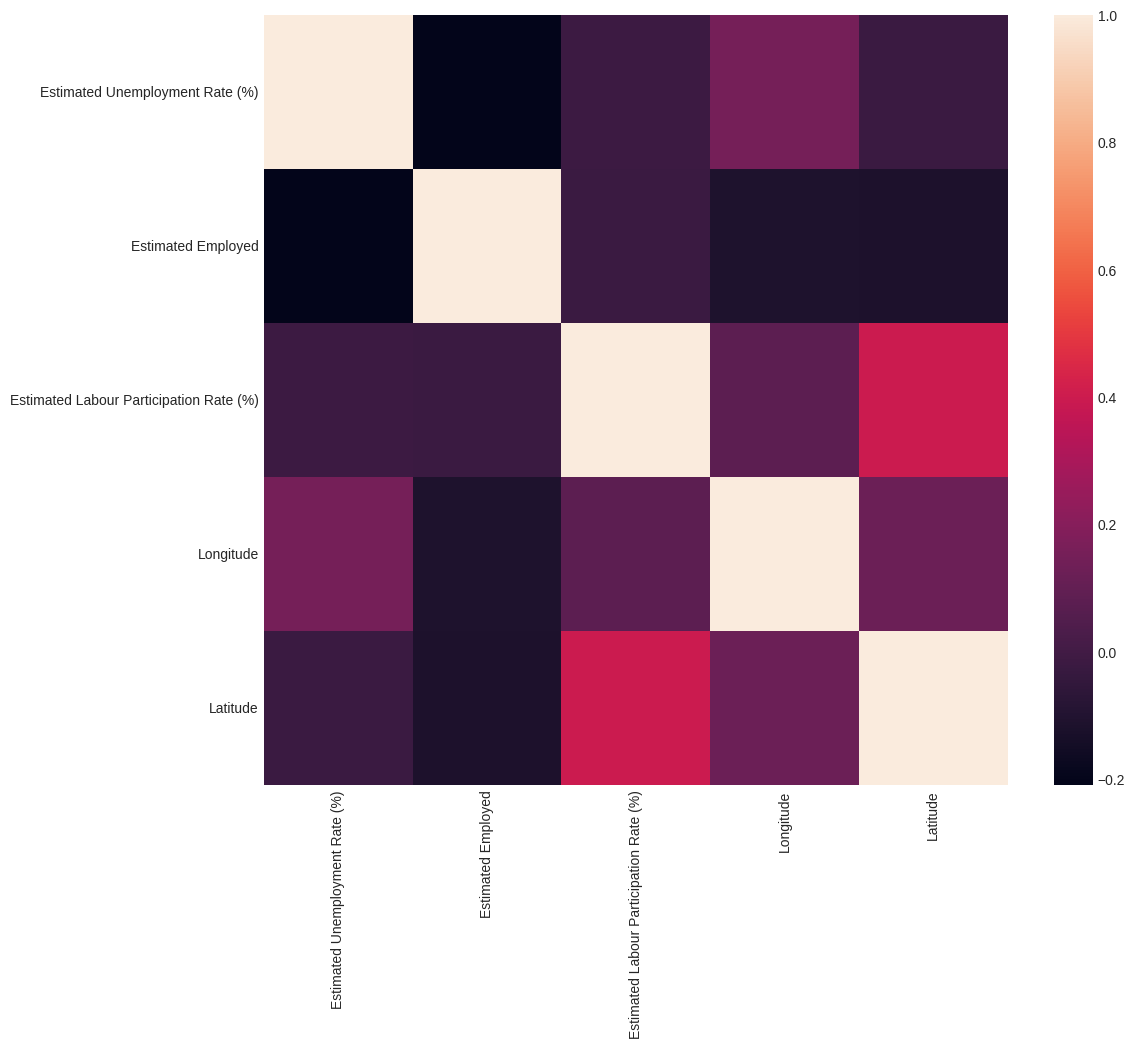

In [ ]:
# checking the correlation between the feature of dataset using heatmap :
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,10))
sns.heatmap(combined_data_cleaned.corr(numeric_only=True))
plt.show()

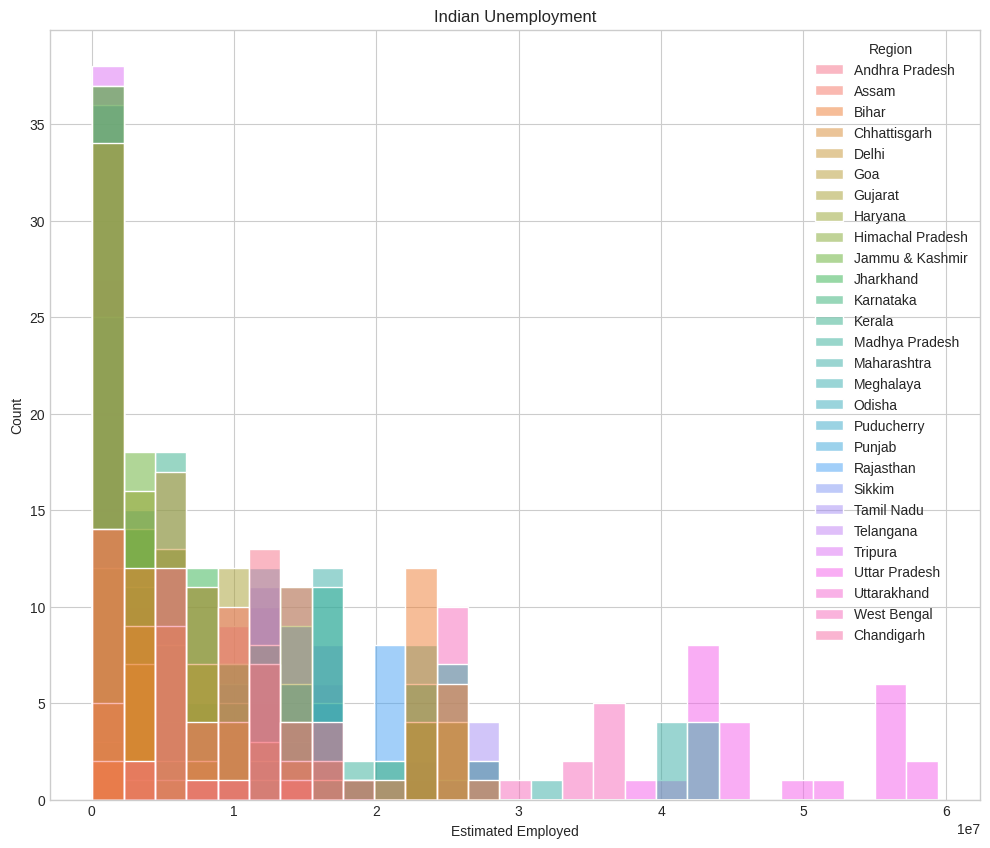

In [ ]:
# checking the estimated number of employee acc to different regions of India :
plt.figure(figsize=(12,10))
plt.title("Indian Unemployment")
sns.histplot(x='Estimated Employed', hue='Region', data=combined_data_cleaned)
plt.show()

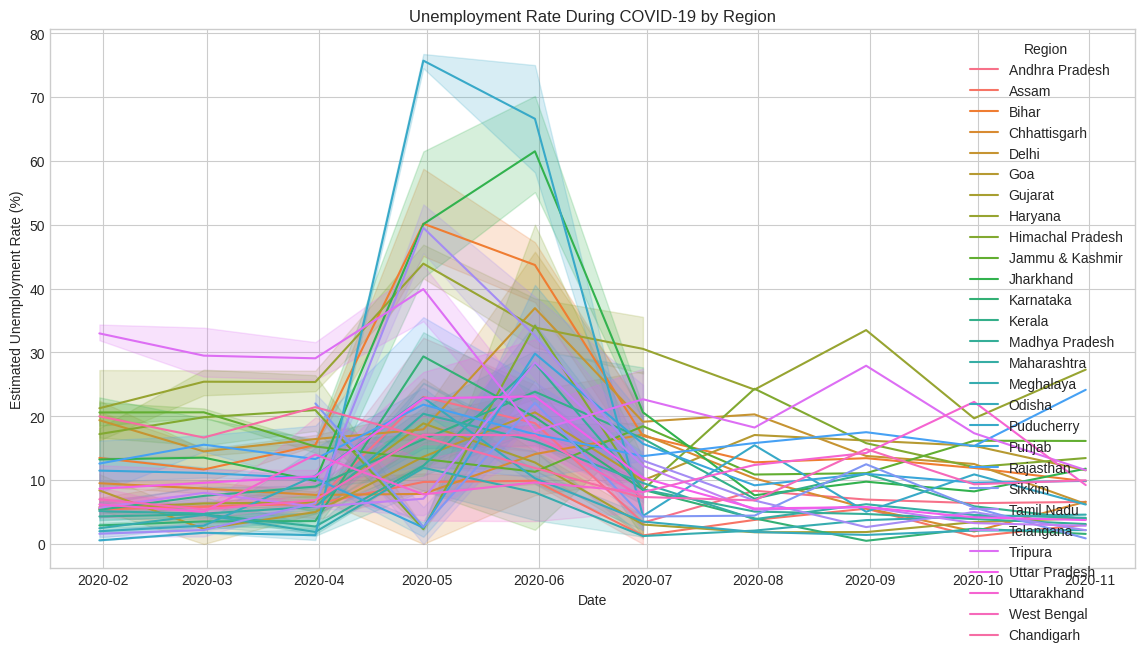

In [ ]:
# Analyze the Impact of COVID-19:

covid_period = combined_data_cleaned[(combined_data_cleaned['Date'] >= '2020-01-01') & (combined_data_cleaned['Date'] <= '2020-12-31')]
plt.figure(figsize=(14, 7))
sns.lineplot(data=covid_period, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate During COVID-19 by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Region')
plt.show()


Predictive Modeling :

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature Engineering
combined_data_cleaned['Month'] = combined_data_cleaned['Date'].dt.month
combined_data_cleaned['Year'] = combined_data_cleaned['Date'].dt.year

# Selecting features and target variable
X = combined_data_cleaned[['Month', 'Year']]
y = combined_data_cleaned['Estimated Unemployment Rate (%)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 93.67870413200413
